In [50]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#!pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [37]:
train = pd.read_csv('Income_training.csv')

In [38]:
train.head()

,compositeHourlyWages,age,yearsEducation,sex1M0F
0,21.38,58,10,1
1,25.15,42,16,1
2,8.57,31,12,0
3,12.07,43,13,0
4,10.97,46,12,0


The mean is:
15.495126681263676
The Standard Deviation is:
7.7547627109995645
The Spread is:
60.13634470390931
The Mode is:
0    7.0
dtype: float64
The Tail is:
3192    14.00
3193    23.04
3194    10.00
3195    10.00
3196     6.57
Name: compositeHourlyWages, dtype: float64


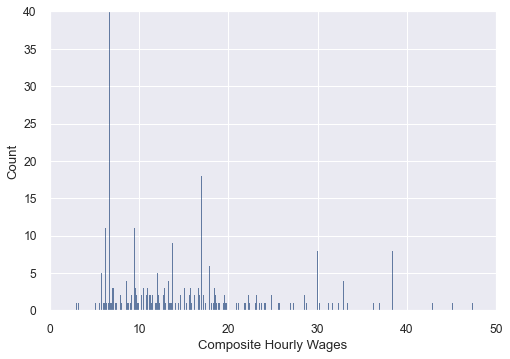

In [39]:
hist = thinkstats2.Hist(train.compositeHourlyWages, label='Composite Hourly Wages')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Composite Hourly Wages', ylabel='Count', axis=[0,50,0,40])

mean = train.compositeHourlyWages.mean()
std = train.compositeHourlyWages.std()
var = train.compositeHourlyWages.var()
mode = train.compositeHourlyWages.mode()
tail = train.compositeHourlyWages.tail()



print("The mean is:")
print(mean)

print("The Standard Deviation is:")
print(std)

print("The Spread is:")
print(var)

print("The Mode is:")
print(mode)

print("The Tail is:")
print(tail)

The mean is:
36.88457929308727
The Standard Deviation is:
11.996980348053164
The Spread is:
143.9275374715738
The Mode is:
0    32
dtype: int64
The Tail is:
3192    29
3193    56
3194    61
3195    40
3196    28
Name: age, dtype: int64


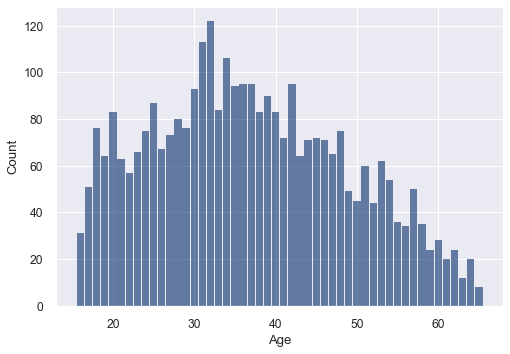

In [40]:
hist = thinkstats2.Hist(train.age, label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age', ylabel='Count')

mean = train.age.mean()
std = train.age.std()
var = train.age.var()
mode = train.age.mode()
tail = train.age.tail()



print("The mean is:")
print(mean)

print("The Standard Deviation is:")
print(std)

print("The Spread is:")
print(var)

print("The Mode is:")
print(mode)

print("The Tail is:")
print(tail)

The mean is:
13.180794494838912
The Standard Deviation is:
3.0421270791712565
The Spread is:
9.25453716582704
The Mode is:
0    12
dtype: int64
The Tail is:
3192    14
3193    15
3194     8
3195    15
3196    13
Name: yearsEducation, dtype: int64


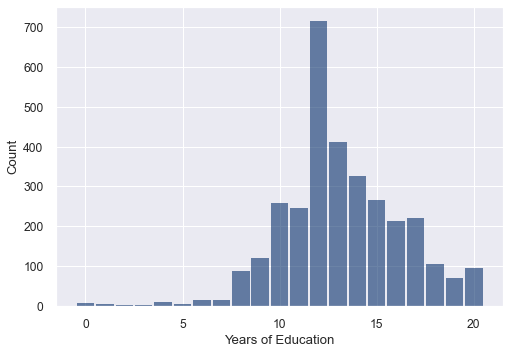

In [41]:
hist = thinkstats2.Hist(train.yearsEducation, label='Years of Education')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Years of Education', ylabel='Count')

mean = train.yearsEducation.mean()
std = train.yearsEducation.std()
var = train.yearsEducation.var()
mode = train.yearsEducation.mode()
tail = train.yearsEducation.tail()



print("The mean is:")
print(mean)

print("The Standard Deviation is:")
print(std)

print("The Spread is:")
print(var)

print("The Mode is:")
print(mode)

print("The Tail is:")
print(tail)

The mean is:
0.49171097904285266
The Standard Deviation is:
0.500009493321838
The Spread is:
0.25000949341196116
The Mode is:
0    0
dtype: int64
The Tail is:
3192    0
3193    0
3194    1
3195    0
3196    0
Name: sex1M0F, dtype: int64


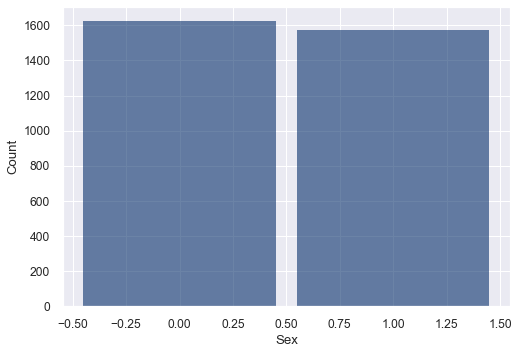

In [42]:
hist = thinkstats2.Hist(train.sex1M0F, label='Sex')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Sex', ylabel='Count')

mean = train.sex1M0F.mean()
std = train.sex1M0F.std()
var = train.sex1M0F.var()
mode = train.sex1M0F.mode()
tail = train.sex1M0F.tail()



print("The mean is:")
print(mean)

print("The Standard Deviation is:")
print(std)

print("The Spread is:")
print(var)

print("The Mode is:")
print(mode)

print("The Tail is:")
print(tail)

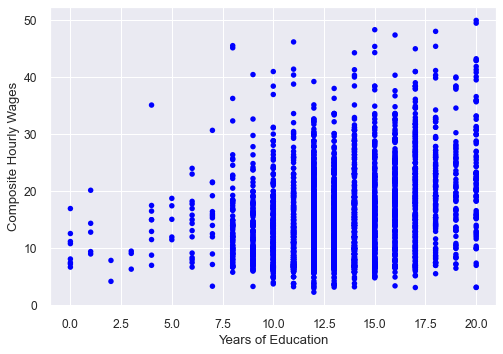

In [43]:
thinkplot.Scatter(train.yearsEducation, train.compositeHourlyWages, alpha=1)
thinkplot.Config(xlabel='Years of Education',
                 ylabel='Composite Hourly Wages',
                 legend=False)

In [44]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [45]:
print('Covariance of Years of Education and Composite Hourly Wages') 
Cov(train.yearsEducation, train.compositeHourlyWages)

Covariance of Years of Education and Composite Hourly Wages


7.1602085637252415

In [46]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [47]:
print('Correlation of Years of Education and Composite Hourly Wages') 
Corr(train.yearsEducation, train.compositeHourlyWages)

Correlation of Years of Education and Composite Hourly Wages


0.30360972124210617

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

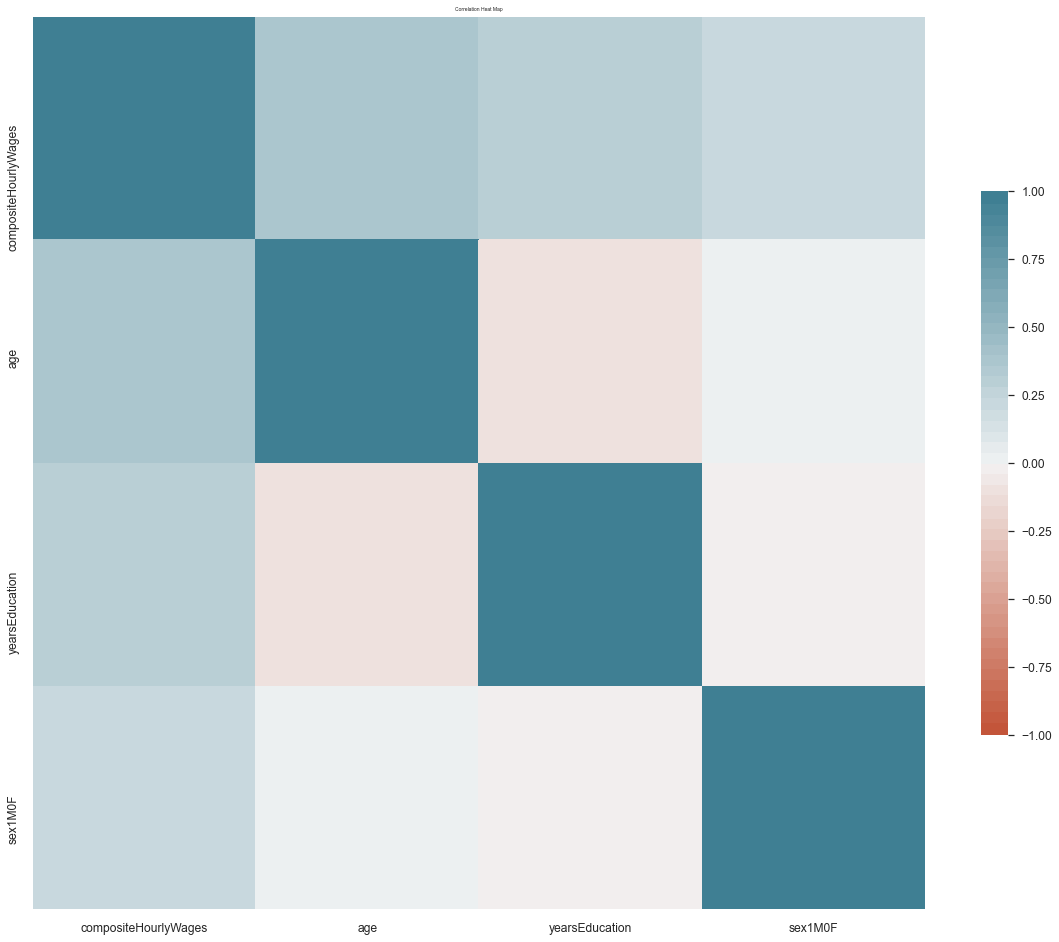

In [49]:
corr = train.corr(method="pearson")
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale= 1.1)
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap=sns.diverging_palette(20, 220, n=50), square=True, cbar_kws={"shrink": 0.5})
plt.title('Correlation Heat Map', fontsize = 5)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
X=train.drop(['compositeHourlyWages'],axis=1)
y=train['compositeHourlyWages']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=123)

In [53]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred=np.round(lm.predict(X_test),2)

In [57]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [58]:
lm_rmse=np.sqrt(mean_squared_error(y_pred, y_test))
lm_train_rmse=np.sqrt(mean_squared_error(lm.predict(X_train), y_train))
lm_variance=abs(lm_train_rmse - lm_rmse)
print("Test RMSE for Linear Regression is ",lm_rmse)
print("Train RMSE for Linear Regression is ",lm_train_rmse)
print("Variance for Linear Regression is ",lm_variance)

Test RMSE for Linear Regression is  6.473173207554391
Train RMSE for Linear Regression is  6.498112270429585
Variance for Linear Regression is  0.02493906287519465


In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 883,n_jobs=-1)
rf.fit(X_train,y_train)
rf_pred= rf.predict(X_test)
rf_rmse=np.sqrt(mean_squared_error(rf_pred, y_test))
print("RMSE for Random Forest is ",rf_rmse)

RMSE for Random Forest is  7.070735217476499
